In [1]:
import os
import sys
!export PYTHONPATH="${PYTHONPATH}:~/gt/3D_tracking/DEV/Tracking/nuscenes"
import numpy as np

from sklearn.utils.linear_assignment_ import linear_assignment

from nuscenes import NuScenes
from nuscenes.eval.common.config import config_factory
from nuscenes.eval.tracking.evaluate import TrackingEval
from nuscenes.eval.detection.data_classes import DetectionConfig
from nuscenes.eval.detection.data_classes import DetectionBox
from nuscenes.eval.tracking.data_classes import TrackingBox
from nuscenes.eval.common.loaders import load_prediction, load_gt, filter_eval_boxes
from nuscenes.eval.tracking.loaders import create_tracks
from pyquaternion import Quaternion
#from main import iou3d, convert_3dbox_to_8corner
import argparse
import pickle 
from utils.dict import *
from utils.stats import add_center_dist
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt

In [2]:
training_file_name = "/media/liangxu/ArmyData/nuscenes/Tracking_result/tracking_tmp/training_data_moving"
training_data = pickle.load(open(training_file_name , 'rb'))


## Generated Corrected Measurements

In [3]:
from tqdm import tqdm

In [4]:
print("Length of the training data ", len(training_data))

Length of the training data  934


In [5]:
print((training_data[0][0]).keys())

dict_keys(['sample_annotation', 'sample', 'sample_data_lidar', 'ego_pose', 'detection'])


In [6]:
print(training_data[0][0]['sample_annotation'].keys())
print(training_data[0][0]['sample_annotation']['translation'])
print(training_data[0][0]['sample_annotation']['rotation'])

dict_keys(['token', 'sample_token', 'instance_token', 'visibility_token', 'attribute_tokens', 'translation', 'size', 'rotation', 'prev', 'next', 'num_lidar_pts', 'num_radar_pts', 'category_name'])
[358.212, 1081.729, 0.756]
[0.8342998112464631, 0.0, 0.0, 0.5513110056529944]


## hard case

40 40 40 39


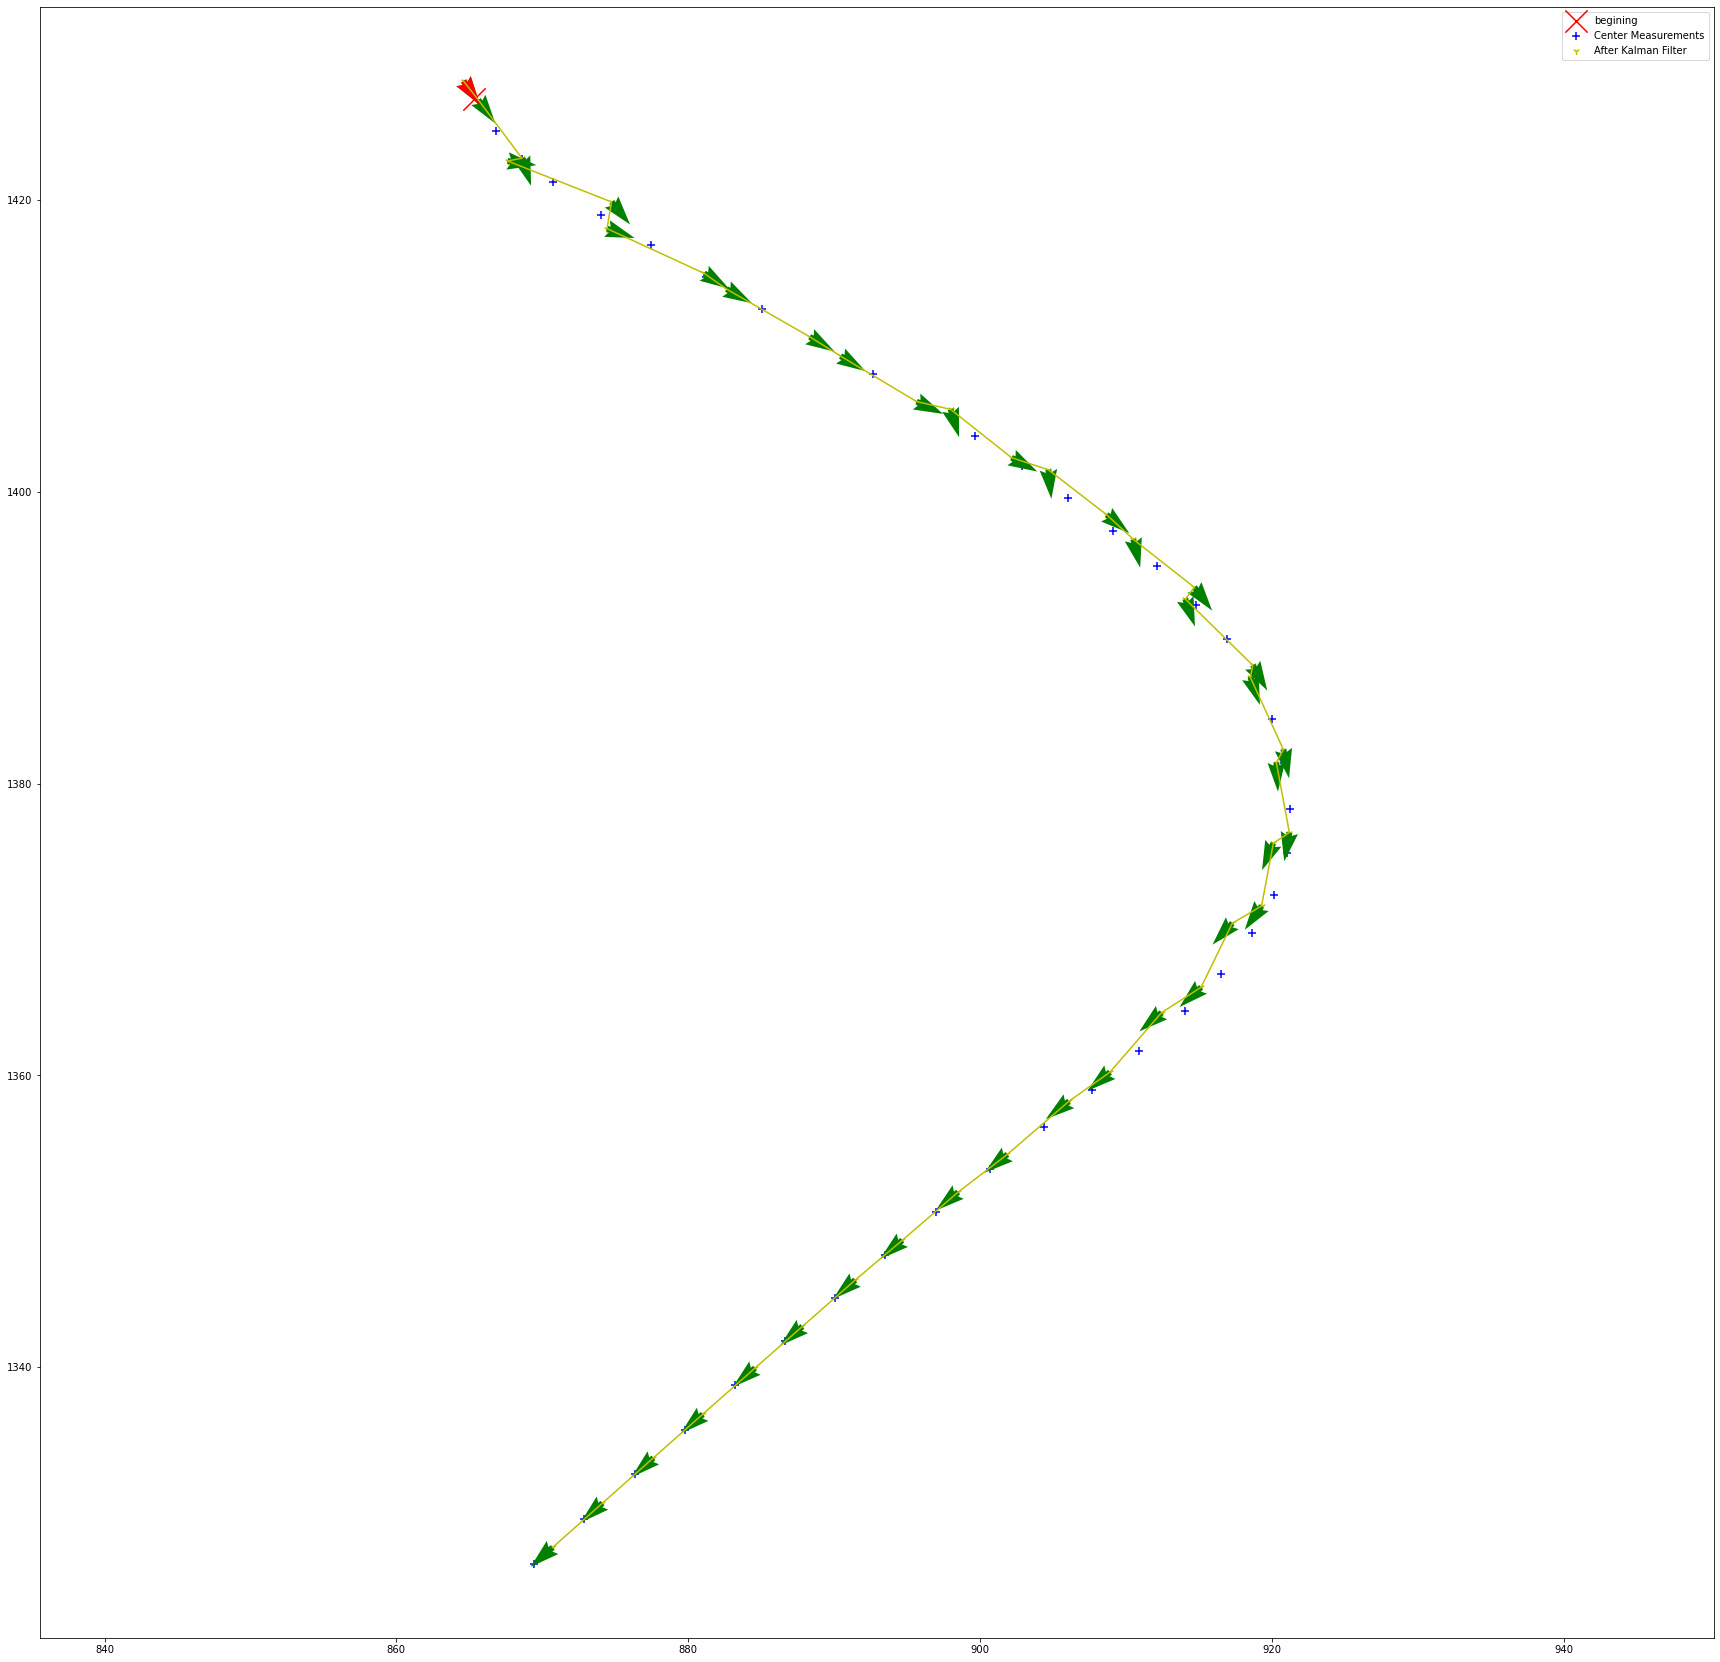

In [57]:
from EKF.generate_GT import *
index = 19
EKF_GT_obj =  EKF_GT()
corrected_data.append(EKF_GT_obj.correct_heading(training_data[index]))
EKF_GT_obj.run_ekf()
EKF_GT_obj.plot_result()

In [32]:
heading = EKF_GT_obj.correct_heading(training_data[index])
for item in EKF_GT_obj.headings:
    print(item)

-1.1761599296327319
-1.0062812157719525
-0.8364025019111732
-0.6665237880503937
-0.5984559472226154
-0.5303881063948372
-0.5303881063948372
-0.5303881063948372
-0.5303881063948372
-0.5303881063948372
-0.5303881063948372
-0.588565748127981
-0.62056345108121
-0.6525611540344388
-0.6932855032476394
-0.73400985246084
-0.7747342016740406
-0.9143605418335855
-1.0539868819931302
-1.193613222152675
-1.3332395623122197
-1.4728659024717645
-1.6974315995616993
-1.9219972966516334
-2.1465629937415684
-2.263500053625187
-2.3804371135088056
-2.411853040044704
-2.443268966580601
-2.474684893116499
-2.462467588352539
-2.4502502835885784
-2.441523637328607
-2.4327969910686353
-2.4327969910686353
-2.4327969910686353
-2.424070344808664
-2.4153436985486922
-2.4153436985486922
-2.4153436985486922
-1.1761599296327319
-1.0062812157719525
-0.8364025019111732
-0.6665237880503937
-0.5984559472226154
-0.5303881063948372
-0.5303881063948372
-0.5303881063948372
-0.5303881063948372
-0.5303881063948372
-0.5303881063

In [67]:
from EKF.generate_GT import *
corrected_data = []
GT_data        = []

for index in tqdm(range(len(training_data))):
    #print("Current track ", index)
    EKF_GT_obj =  EKF_GT()
    corrected_data.append(EKF_GT_obj.correct_heading(training_data[index]))
    #EKF_GT_obj.run_ekf()
    #GT_data.append(EKF_GT_obj.KalmanFilter.afterSmooth.x)
    #EKF_GT_obj.plot_result()
    

100%|██████████| 934/934 [00:09<00:00, 101.62it/s]


## Save the GT data

In [68]:
correcte_measurement_file_name = "/media/liangxu/ArmyData/nuscenes/Tracking_result/tracking_tmp/training_data_moving_heading_corrected"
GT_data_file_name = "/media/liangxu/ArmyData/nuscenes/Tracking_result/tracking_tmp/training_data_moving_GT"

In [69]:
with open(correcte_measurement_file_name, 'wb') as f:
    pickle.dump(corrected_data, f)
#with open(GT_data_file_name, 'wb') as f:
#    pickle.dump(GT_data, f)